# İş Uygulaması: Web Sitesinde Geçirilen Sürenin Testi
### Web sitesinde geçirilen süre gerçekten 170sn mi? (Tek Örneklem T Testi)
## Detaylar
* Yazılımlardan elde edilen web süresinde geçirilen ort. süreler var 
* Hipotez testleriyle bu sürenin gerçekliğini ispat edilmek isteniyor

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats

olcumler = np.array([17,160,234,149,145,107,197,75,201,225, 211,119,
                     157, 145,127,244,163,114,145,65,112,185,202,146,203,
                     224,203, 114,188,156,187,154,177,96,165,50,110,
                     216, 138, 151,166,135,155,84,251,173,131,207,121,120])

In [2]:
olcumler[0:10]

array([ 17, 160, 234, 149, 145, 107, 197,  75, 201, 225])

In [3]:
stats.describe(olcumler)  #pands cevr. gerkt. icin stats.descrb kullanıldı

DescribeResult(nobs=50, minmax=(17, 251), mean=154.4, variance=2575.6326530612246, skewness=-0.32399653469680706, kurtosis=-0.055053811933191366)

# Varsayım Testleri
## Normallik Varsayımları
Varsayım testleri iki şekilde gerçekleştirilebilir 
* Grafik Yöntemlerle (histogram ve qqplot)
* Bazı testler ile (shapiro)


<Axes: ylabel='Frequency'>

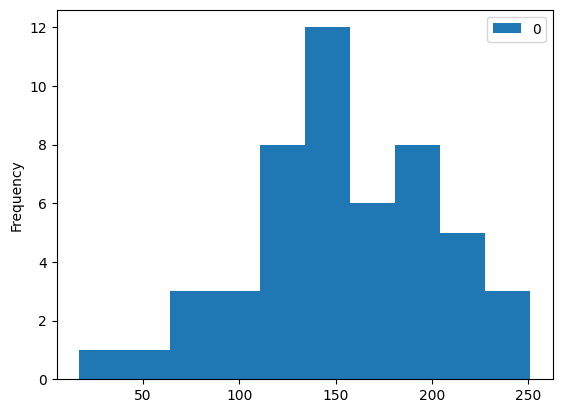

In [4]:
#Histogram Grafk.
pd.DataFrame(olcumler).plot.hist()

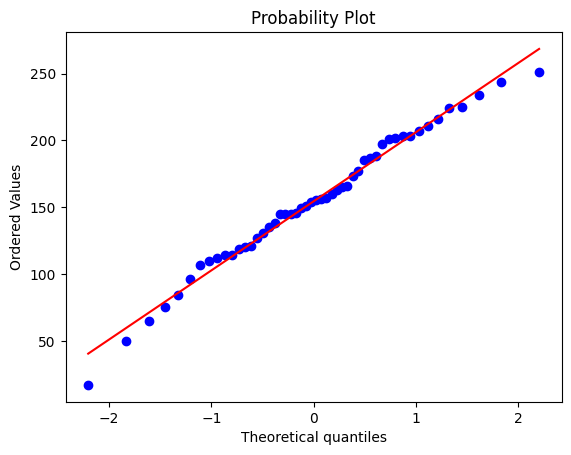

In [5]:
#qqplot Grafik.

import pylab
stats.probplot(olcumler, dist="norm", plot=pylab)
pylab.show()

Ordered Values (Örnek Dağılımını) => Elimizdeki gözlemlerin dağılımı  
Theoretical quantiles (Teorik Dağılımı) => Normal dağılım  

=> Bu grafik çıkarımından örnek dağılımı ve teorik dağılım eşit olduğunu görmekteyiz.


## Shapiro-Wilk Testi
H0: Örnek dağılımı ve teorik dağılım arasında istatistiksel olarak anlamlı bir fark yoktur.  
H1: ... fark vardır

In [6]:
from scipy.stats import shapiro

shapiro(olcumler)

ShapiroResult(statistic=0.9852635887629486, pvalue=0.7828790198476998)

pvalue değeri > 0.05'den olduğu için H0 reddedilemez.  

H0: Örnek dağılımı ve teorik dağılım arasında istatistiksel olarak anlamlı bir fark yoktur.  
=> Tek Örneklem T Testini Uygulayabiliriz çünkü Normal Dağılım Varsayılımı sağlanmıştır

In [7]:
#Hipotez Testinin Uygulanması
stats.ttest_1samp(olcumler, popmean=170)

TtestResult(statistic=-2.1735400119120696, pvalue=0.03460101843133983, df=49)

H0: Web sitesinde geçirilen ortalama süre 170sn  
H1: ... değildir

=> Pvalue < 0.05 olduğu için H0 hipotezi reddedilir  
=> Ortalamadan da yola çıkarak yorum yapacak olursak  
=> Web sitesinde geçirilen süre 170sn den küçüktür, yorumu yapılabilir

# Noneparametrik Tek Örneklem Testi
Bir önceki bölümde varsayım testlerinde p.value > 0.05 olduğu için  
Hipotezimizi kurduk ve shapiro-wilk testi ile Tek Örneklem Testini gerçekleştirdik  
Fakat bazı durumlarda varsayıma uygunluk testini geçemeyen yani parametrik olmayan durumlarda mevcuttur  
Bu durumlarda Noneparametrik testler ile işleme devam etmek zorundayız  
Aksi halde yapılan işlemler, alınan kararlar güven vermeyecektir.  
Bu hata sektörde ve eğitimlerde çok yapılan bir hatadır ve dikkat edilmesi gerekmektedir.


In [9]:
#Bu testlerden birisi sign yani işaret testidir.
# !!!Örnek bağlamında yukarı gerçekleşen shapiro testinin varsayuma uyguna olmadığını baz alarak işleme devam edilmiştir...

from statsmodels.stats.descriptivestats import sign_test

In [ ]:
sign_test(olcumler, 170)

### Test istatistiği: -07.0  
### P-value = 0.064  

!!! Bir önceki T Testinde gerçekleştirmiş olduğumuz örnekte test sonucumuz doğruluğunu sağlamaktadır  
Örnek olması açısından Sign_Test (none-parametric) bir test ile devam ettik  
ve Sign_Test ile (merkezi eğilime yönelik bir testtir) ortalamanın 170 olup olmadığını kontrol etmiş olduk...  

Normal şartlarda Dağılımın çarpık oldığu durumlarda ortalama kabul edilemeyeceği gibi parametrik testte kullanılamaz  
Bu varsayımdan ortaya çıkarak bir none-parametric kullandık ve sonuçlar=>  
none-parametrik sonucunda ortaya çıkan durum aynı olsa da bazı küçük farklar olabilir  


### Yorum
p-value > 0.05 olduğu için H0 reddedilemez
zaten dagılım normalde parametrikti 
eğer sağlanmamıs olsaydı ona noneparametrik kullanıp buradaki p-value değerine göre bir karar alacaktık